In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("adultData2.csv")

In [4]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marrital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

### Counting the Protected Class Subgroups

##### Age

In [6]:
old_age = (df.Age >= 40).sum()
young_age = (df.Age < 40).sum()

print("≥ 40: ", old_age)
print("< 40: ", young_age)

≥ 40:  14237
< 40:  18324


##### Sex

In [7]:
male = df[df['Sex'].str.strip() == "Male"].shape
female = df[df['Sex'].str.strip() == "Female"].shape

print("male: ", male[0])
print("female: ", female[0])
print("total: ", male[0]+female[0])

male:  21790
female:  10771
total:  32561


##### Race

In [8]:
white = df[df['Race'].str.strip() == "White"].shape[0]
black = df[df['Race'].str.strip() == "Black"].shape[0]
asian_pac = df[df['Race'].str.strip() == "Asian-Pac-Islander"].shape[0]
amer_ind_esk = df[df['Race'].str.strip() == "Amer-Indian-Eskimo"].shape[0]
other = df[df['Race'].str.strip() == "Other"].shape[0]

print("white: ", white)
print("black: ", black)
print("asian_pac: ", asian_pac)
print("amer_ind_esk: ", amer_ind_esk)
print("other: ", other)

white:  27816
black:  3124
asian_pac:  1039
amer_ind_esk:  311
other:  271


##### Marital Status

In [9]:
Married_civ_spouse = df[df['Marrital-Status'].str.strip() == "Married-civ-spouse"].shape[0]
Divorced = df[df['Marrital-Status'].str.strip() == "Divorced"].shape[0]
Never_married = df[df['Marrital-Status'].str.strip() == "Never-married"].shape[0]
Separated = df[df['Marrital-Status'].str.strip() == "Separated"].shape[0]
Widowed = df[df['Marrital-Status'].str.strip() == "Widowed"].shape[0]
Married_spouse_absent = df[df['Marrital-Status'].str.strip() == "Married-spouse-absent"].shape[0]
Married_AF_spouse = df[df['Marrital-Status'].str.strip() == "Married-AF-spouse"].shape[0]

print("Married_civ_spouse: ", Married_civ_spouse)
print("Divorced: ", Divorced)
print("Never_married: ", Never_married)
print("Separated: ", Separated)
print("Widowed: ", Widowed)
print("Married_spouse_absent: ", Married_spouse_absent)
print("Married_AF_spouse: ", Married_AF_spouse)

Married_civ_spouse:  14976
Divorced:  4443
Never_married:  10683
Separated:  1025
Widowed:  993
Married_spouse_absent:  418
Married_AF_spouse:  23


##### Native-Country

In [10]:
# United States
# Puerto Rico
# Canada
# Outlying-US(Guam-USVI-etc)
# Cuba
# Honduras
# Jamaica
# Mexico
# Dominican Republic
# Haiti
# Guatemala
# Nicaragua
# El Salvador
# Trinidad & Tobago
united_states = df[df['Native-Country'].str.strip() == "United-States"].shape[0]
puerto = df[df['Native-Country'].str.strip() == "Puerto-Rico"].shape[0]
canada = df[df['Native-Country'].str.strip() == "Canada"].shape[0]
guam = df[df['Native-Country'].str.strip() == "Outlying-US(Guam-USVI-etc)"].shape[0]
cuba = df[df['Native-Country'].str.strip() == "Cuba"].shape[0]
honduras = df[df['Native-Country'].str.strip() == "Honduras"].shape[0]
jamaica = df[df['Native-Country'].str.strip() == "Jamaica"].shape[0]
mexico = df[df['Native-Country'].str.strip() == "Mexico"].shape[0]
dom_rep = df[df['Native-Country'].str.strip() == "Dominican-Republic"].shape[0]
haiti = df[df['Native-Country'].str.strip() == "Haiti"].shape[0]
guat = df[df['Native-Country'].str.strip() == "Guatemala"].shape[0]
nic = df[df['Native-Country'].str.strip() == "Nicaragua"].shape[0]
salv = df[df['Native-Country'].str.strip() == "El-Salvador"].shape[0]
tobago = df[df['Native-Country'].str.strip() == "Trinadad&Tobago"].shape[0]
north_america = united_states + puerto + canada + guam + cuba + honduras + jamaica + mexico + dom_rep + haiti + guat + nic + salv + tobago
print(("North America",north_america))


# Ecuador
# Columbia
# Peru
ecuador = df[df['Native-Country'].str.strip() == "Ecuador"].shape[0]
columbia = df[df['Native-Country'].str.strip() == "Columbia"].shape[0]
peru = df[df['Native-Country'].str.strip() == "Peru"].shape[0]
south_america = ecuador + columbia + peru
print(("SA: ", south_america))

# England
# Germany
# Greece
# Italy
# Poland
# Portugal
# Ireland
# France
# Hungary
# Scotland
# Yugoslavia
# Holand-Netherlands
england = df[df['Native-Country'].str.strip() == "England"].shape[0]
germany = df[df['Native-Country'].str.strip() == "Germany"].shape[0]
greece = df[df['Native-Country'].str.strip() == "Greece"].shape[0]
italy = df[df['Native-Country'].str.strip() == "Italy"].shape[0]
poland = df[df['Native-Country'].str.strip() == "Poland"].shape[0]
portugal = df[df['Native-Country'].str.strip() == "Portugal"].shape[0]
ireland = df[df['Native-Country'].str.strip() == "Ireland"].shape[0]
france = df[df['Native-Country'].str.strip() == "France"].shape[0]
hungary = df[df['Native-Country'].str.strip() == "Hungary"].shape[0]
scotland = df[df['Native-Country'].str.strip() == "Scotland"].shape[0]
yugoslavia = df[df['Native-Country'].str.strip() == "Yugoslavia"].shape[0]
netherlands = df[df['Native-Country'].str.strip() == "Holand-Netherlands"].shape[0]
europe = england + germany + italy + poland + portugal + ireland + france + hungary + scotland + yugoslavia + netherlands + greece
print(("EU: ", europe))

# Cambodia
# India
# Japan
# China
# Iran
# Philippines
# Vietnam
# Laos
# Taiwan
# Thailand
cambodia = df[df['Native-Country'].str.strip() == "Cambodia"].shape[0]
india = df[df['Native-Country'].str.strip() == "India"].shape[0]
japan = df[df['Native-Country'].str.strip() == "Japan"].shape[0]
china = df[df['Native-Country'].str.strip() == "China"].shape[0]
iran = df[df['Native-Country'].str.strip() == "Iran"].shape[0]
philippines = df[df['Native-Country'].str.strip() == "Philippines"].shape[0]
vietnam = df[df['Native-Country'].str.strip() == "Vietnam"].shape[0]
laos = df[df['Native-Country'].str.strip() == "Laos"].shape[0]
taiwan = df[df['Native-Country'].str.strip() == "Taiwan"].shape[0]
thailand = df[df['Native-Country'].str.strip() == "Thailand"].shape[0]
asia = cambodia + india + japan + china + iran + philippines + vietnam + laos + taiwan + thailand
print(("Asia: ", asia))

# ?
# South
# Hong
unknown = df[df['Native-Country'].str.strip() == "?"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Hong"].shape[0] \
+ df[df['Native-Country'].str.strip() == "South"].shape[0]
print(("Unknown",unknown))

('North America', 30588)
('SA: ', 118)
('EU: ', 521)
('Asia: ', 651)
('Unknown', 683)


##### Relationship

In [11]:
wife = df[df['Relationship'].str.strip() == "Wife"].shape[0]
own_child = df[df['Relationship'].str.strip() == "Own-child"].shape[0]
husband = df[df['Relationship'].str.strip() == "Husband"].shape[0]
not_in_fam = df[df['Relationship'].str.strip() == "Not-in-family"].shape[0]
other_relative = df[df['Relationship'].str.strip() == "Other-relative"].shape[0]
unmarried = df[df['Relationship'].str.strip() == "Unmarried"].shape[0]

print(("Wife", wife))
print(("Own-child", own_child))
print(("Husband", husband))
print(("Not-in-family", not_in_fam))
print(("Other-relative", other_relative))
print(("Unmarried", unmarried))

('Wife', 1568)
('Own-child', 5068)
('Husband', 13193)
('Not-in-family', 8305)
('Other-relative', 981)
('Unmarried', 3446)


## 2.4 Discretized Variables

### Education Level

##### Pre-high-school

In [12]:
# Pre high school and AGE
old_age_one_four = ((df['Age']>= 40) & (df['Education'].str.strip() == "1st-4th")).sum()
old_age_five_six = ((df['Age']>= 40) & (df['Education'].str.strip() == "5th-6th")).sum()
old_age_seven_eight = ((df['Age']>= 40) & (df['Education'].str.strip() == "7th-8th")).sum()
old_age_preschool = ((df['Age']>= 40) & (df['Education'].str.strip() == "Preschool")).sum()
young_age_one_four = ((df['Age']< 40) & (df['Education'].str.strip() == "1st-4th")).sum()
young_age_five_six = ((df['Age']< 40) & (df['Education'].str.strip() == "5th-6th")).sum()
young_age_seven_eight = ((df['Age']< 40) & (df['Education'].str.strip() == "7th-8th")).sum()
young_age_preschool = ((df['Age']< 40) & (df['Education'].str.strip() == "Preschool")).sum()
old_age_HS_pre_HS = old_age_one_four + old_age_five_six + old_age_seven_eight + old_age_preschool
young_age_HS_pre_HS = young_age_one_four + young_age_five_six + young_age_seven_eight + young_age_preschool
print(("old_age_HS_pre_HS", old_age_HS_pre_HS))
print(("young_age_HS_pre_HS", young_age_HS_pre_HS))

# Pre high

('old_age_HS_pre_HS', 764)
('young_age_HS_pre_HS', 434)


##### High School Non Grad

In [13]:
# high_school_non_grad
#     9th, 10th, 11th, 12th

# high_school_non_grad and Age
# hs_non_grad_bool = (df['Education'].str.strip() == "9th") or (df['Education'].str.strip() == "10th") or (df['Education'].str.strip() == "11th") or (df['Education'].str.strip() == "12th")
old_age_9th = ((df['Age']>= 40) & (df['Education'].str.strip() == "9th")).sum()
old_age_10th = ((df['Age']>= 40) & (df['Education'].str.strip() == "10th")).sum()
old_age_11th = ((df['Age']>= 40) & (df['Education'].str.strip() == "11th")).sum()
old_age_12th = ((df['Age']>= 40) & (df['Education'].str.strip() == "12th")).sum()
young_age_9th = ((df['Age']< 40) & (df['Education'].str.strip() == "9th")).sum()
young_age_10th = ((df['Age']< 40) & (df['Education'].str.strip() == "10th")).sum()
young_age_11th = ((df['Age']< 40) & (df['Education'].str.strip() == "11th")).sum()
young_age_12th = ((df['Age']< 40) & (df['Education'].str.strip() == "12th")).sum()
hs_non_grad_old = old_age_9th + old_age_10th + old_age_11th + old_age_12th
hs_non_grad_young = young_age_9th + young_age_10th + young_age_11th + young_age_12th
print(("hs_non_grad_old", hs_non_grad_old))
print(("hs_non_grad_young", hs_non_grad_young))
print()


('hs_non_grad_old', 1091)
('hs_non_grad_young', 1964)



##### High School Grad

In [14]:
# high_school_grad
#     HS-grad

# high_school_grad and Age
hs_grad_old = df[((df.Age >= 40) & (df['Education'].str.strip() == "HS-grad"))].shape[0]
hs_grad_young = df[((df.Age < 40) & (df['Education'].str.strip() == "HS-grad"))].shape[0]
print(("hs_grad_old", hs_grad_old))
print(("hs_grad_young", hs_grad_young))
print()



# high_school_grad and 




('hs_grad_old', 4584)
('hs_grad_young', 5917)



##### Some College

In [15]:
# Some College and AGE
old_age_some_college = ((df['Age']>= 40) & (df['Education'].str.strip() == "Some-college")).sum()
young_age_some_college = ((df['Age'] < 40) & (df['Education'].str.strip() == "Some-college")).sum()
print(("old_age_some_college", old_age_some_college))
print(("young_age_some_college", young_age_some_college))

('old_age_some_college', 2690)
('young_age_some_college', 4601)


##### Associate Degree

In [16]:
# Assoc degree and AGE
old_age_assoc_acdm = ((df['Age']>= 40) & (df['Education'].str.strip() == "Assoc-acdm")).sum()
old_age_assoc_voc = ((df['Age']>= 40) & (df['Education'].str.strip() == "Assoc-voc")).sum()
young_age_assoc_acdm = ((df['Age'] < 40) & (df['Education'].str.strip() == "Assoc-acdm")).sum()
young_age_assoc_voc = ((df['Age'] < 40) & (df['Education'].str.strip() == "Assoc-voc")).sum()
young_age_assoc = young_age_assoc_acdm + young_age_assoc_voc
old_age_assoc = old_age_assoc_acdm + old_age_assoc_voc
print(("old_age_assoc", old_age_assoc))
print(("young_age_assoc", young_age_assoc))

('old_age_assoc', 1001)
('young_age_assoc', 1448)


##### Bachelors

In [17]:
# Bachelors and AGE
old_age_bach = ((df['Age']>= 40) & (df['Education'].str.strip() == "Bachelors")).sum()
young_age_bach = ((df['Age'] < 40) & (df['Education'].str.strip() == "Bachelors")).sum()
print(("old_age_bach", old_age_bach))
print(("young_age_bach", young_age_bach))

('old_age_bach', 2316)
('young_age_bach', 3039)


##### Post Bachelors

In [18]:
# Post bachelors and AGE
old_age_doctorate = ((df['Age']>= 40) & (df['Education'].str.strip() == "Doctorate")).sum()
old_age_masters = ((df['Age']>= 40) & (df['Education'].str.strip() == "Masters")).sum()
old_age_prof_school =((df['Age']>= 40) & (df['Education'].str.strip() == "Prof-school")).sum()
young_age_doctorate = ((df['Age'] < 40) & (df['Education'].str.strip() == "Doctorate")).sum()
young_age_masters = ((df['Age'] < 40) & (df['Education'].str.strip() == "Masters")).sum()
young_age_prof_school =((df['Age'] < 40) & (df['Education'].str.strip() == "Prof-school")).sum()
young_age_post_bach = young_age_doctorate + young_age_masters +  young_age_prof_school
old_age_post_bach = old_age_doctorate + old_age_masters +  old_age_prof_school
print(("old_age_post_bach", old_age_post_bach))
print(("young_age_post_bach", young_age_post_bach))

('old_age_post_bach', 1791)
('young_age_post_bach', 921)


#### Married Civ and _Education Level_

In [19]:
#  Groups
# Married_civ_spouse = df[df['Marrital-Status'].str.strip() == "Married-civ-spouse"].shape[0]
# Divorced = df[df['Marrital-Status'].str.strip() == "Divorced"].shape[0]
# Never_married = df[df['Marrital-Status'].str.strip() == "Never-married"].shape[0]
# Separated = df[df['Marrital-Status'].str.strip() == "Separated"].shape[0]
# Widowed = df[df['Marrital-Status'].str.strip() == "Widowed"].shape[0]
# Married_spouse_absent = df[df['Marrital-Status'].str.strip() == "Married-spouse-absent"].shape[0]
# Married_AF_spouse = df[df['Marrital-Status'].str.strip() == "Married-AF-spouse"].shape[0]



# Pre high school
# 1st-4th")).sum()
# old_age_five_six = ((df['Age']>= 40) & (df['Education'].str.strip() == "5th-6th")).sum()
# old_age_seven_eight = ((df['Age']>= 40) & (df['Education'].str.strip() == "7th-8th")).sum()
# old_age_preschool = ((df['Age']>= 40) & (df['Education'].str.strip() == "Preschool"
married_civ_1st = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "1st-4th")).sum()
married_civ_5th = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "5th-6th")).sum()
married_civ_7th = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "7th-8th")).sum()
married_civ_preschool = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "Preschool")).sum()
married_civ_pre_high_school = married_civ_1st + married_civ_5th + married_civ_7th + married_civ_preschool
print(("married_civ_pre_high_school", married_civ_pre_high_school))

# Some high school
# "9th")).sum()
# old_age_10th = ((df['Age']>= 40) & (df['Education'].str.strip() == "10th")).sum()
# old_age_11th = ((df['Age']>= 40) & (df['Education'].str.strip() == "11th")).sum()
# old_age_12th = ((df['Age']>= 40) & (df['Education'].str.strip() == "12th")).sum()
married_civ_9th = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "9th")).sum()
married_civ_10th = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "10th")).sum()
married_civ_11th = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "11th")).sum()
married_civ_12th = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "12th")).sum()
married_civ_some_high_school = married_civ_9th + married_civ_10th + married_civ_11th + married_civ_12th
print(("married_civ_some_high_school", married_civ_some_high_school))

# High school grad
# HS-grad
married_civ_hs_grad = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("married_civ_hs_grad", married_civ_hs_grad))

# some college
# Some-college
married_civ_some_college = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "Some-college")).sum()
print(("married_civ_some_college", married_civ_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
married_civ_assoc_acdm = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
married_civ_assoc_voc = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "Assoc-voc")).sum()
married_civ_associates = married_civ_assoc_acdm + married_civ_assoc_voc
print(("married_civ_associates", married_civ_associates))

# Bachelors
# Bachelors
married_civ_bach = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("married_civ_bach", married_civ_bach))

# Post bachelors
# "Doctorate")).sum()
# old_age_masters = ((df['Age']>= 40) & (df['Education'].str.strip() == "Masters")).sum()
# old_age_prof_school =((df['Age']>= 40) & (df['Education'].str.strip() == "Prof-school")).sum()
married_civ_doctorate = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "Doctorate")).sum()
married_civ_master = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "Masters")).sum()
married_civ_prof_school = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Education'].str.strip() == "Prof-school")).sum()
married_civ_post_bach = married_civ_doctorate + married_civ_master + married_civ_prof_school
print(("married_civ_post_bach", married_civ_post_bach))


('married_civ_pre_high_school', 632)
('married_civ_some_high_school', 1063)
('married_civ_hs_grad', 4845)
('married_civ_some_college', 2818)
('married_civ_associates', 1149)
('married_civ_bach', 2768)
('married_civ_post_bach', 1701)


#### Divorced and Education Level

In [20]:
# Pre-high-school
divorced_1st = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "1st-4th")).sum()
divorced_5th = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "5th-6th")).sum()
divorced_7th = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "7th-8th")).sum()
divorced_preschool = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "Preschool")).sum()
divorced_pre_high_school = divorced_1st + divorced_5th + divorced_7th + divorced_preschool
print(("divorced_pre_high_school", divorced_pre_high_school))

# Some high school
# "9th")).sum()
# old_age_10th = ((df['Age']>= 40) & (df['Education'].str.strip() == "10th")).sum()
# old_age_11th = ((df['Age']>= 40) & (df['Education'].str.strip() == "11th")).sum()
# old_age_12th = ((df['Age']>= 40) & (df['Education'].str.strip() == "12th")).sum()
divorced_9th = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "9th")).sum()
divorced_10th = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "10th")).sum()
divorced_11th = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "11th")).sum()
divorced_12th = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "12th")).sum()
divorced_some_high_school = divorced_9th + divorced_10th + divorced_11th + divorced_12th
print(("divorced_some_high_school", divorced_some_high_school))

# High school grad
# HS-grad
divorced_hs_grad = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("divorced_hs_grad", divorced_hs_grad))

# some college
# Some-college
divorced_some_college = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "Some-college")).sum()
print(("divorced_some_college", divorced_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
divorced_assoc_acdm = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
divorced_assoc_voc = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "Assoc-voc")).sum()
divorced_associates = divorced_assoc_acdm + divorced_assoc_voc
print(("divorced_associates", divorced_associates))

# Bachelors
# Bachelors
divorced_bach = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("divorced_bach", divorced_bach))

# Post bachelors
# "Doctorate")).sum()
# old_age_masters = ((df['Age']>= 40) & (df['Education'].str.strip() == "Masters")).sum()
# old_age_prof_school =((df['Age']>= 40) & (df['Education'].str.strip() == "Prof-school")).sum()
divorced_doctorate = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "Doctorate")).sum()
divorced_master = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "Masters")).sum()
divorced_prof_school = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Education'].str.strip() == "Prof-school")).sum()
divorced_post_bach = divorced_doctorate + divorced_master + divorced_prof_school
print(("divorced_post_bach", divorced_post_bach))

('divorced_pre_high_school', 104)
('divorced_some_high_school', 353)
('divorced_hs_grad', 1613)
('divorced_some_college', 1069)
('divorced_associates', 437)
('divorced_bach', 546)
('divorced_post_bach', 321)


#### Never-Married

In [21]:
# Pre-high-school
never_married_1st = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "1st-4th")).sum()
never_married_5th = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "5th-6th")).sum()
never_married_7th = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "7th-8th")).sum()
never_married_preschool = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "Preschool")).sum()
never_married_pre_high_school = never_married_1st + never_married_5th + never_married_7th + never_married_preschool
print(("never_married_pre_high_school", never_married_pre_high_school))

# Some high school
# "9th")).sum()
# old_age_10th = ((df['Age']>= 40) & (df['Education'].str.strip() == "10th")).sum()
# old_age_11th = ((df['Age']>= 40) & (df['Education'].str.strip() == "11th")).sum()
# old_age_12th = ((df['Age']>= 40) & (df['Education'].str.strip() == "12th")).sum()
never_married_9th = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "9th")).sum()
never_married_10th = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "10th")).sum()
never_married_11th = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "11th")).sum()
never_married_12th = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "12th")).sum()
never_married_some_high_school = never_married_9th + never_married_10th + never_married_11th + never_married_12th
print(("never_married_some_high_school", never_married_some_high_school))

# High school grad
# HS-grad
never_married_hs_grad = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("never_married_hs_grad", never_married_hs_grad))

# some college
# Some-college
never_married_some_college = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "Some-college")).sum()
print(("never_married_some_college", never_married_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
never_married_assoc_acdm = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
never_married_assoc_voc = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "Assoc-voc")).sum()
never_married_associates = never_married_assoc_acdm + never_married_assoc_voc
print(("never_married_associates", never_married_associates))

# Bachelors
# Bachelors
never_married_bach = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("never_married_bach", never_married_bach))

# Post bachelors
# "Doctorate")).sum()
# old_age_masters = ((df['Age']>= 40) & (df['Education'].str.strip() == "Masters")).sum()
# old_age_prof_school =((df['Age']>= 40) & (df['Education'].str.strip() == "Prof-school")).sum()
never_married_doctorate = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "Doctorate")).sum()
never_married_master = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "Masters")).sum()
never_married_prof_school = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Education'].str.strip() == "Prof-school")).sum()
never_married_post_bach = never_married_doctorate + never_married_master + never_married_prof_school
print(("never_married_post_bach", never_married_post_bach))

('never_married_pre_high_school', 263)
('never_married_some_high_school', 1334)
('never_married_hs_grad', 3089)
('never_married_some_college', 2933)
('never_married_associates', 699)
('never_married_bach', 1795)
('never_married_post_bach', 570)


#### Separated

In [22]:
# Pre-high-school
separated_1st = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "1st-4th")).sum()
separated_5th = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "5th-6th")).sum()
separated_7th = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "7th-8th")).sum()
separated_preschool = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "Preschool")).sum()
separated_pre_high_school = separated_1st + separated_5th + separated_7th + separated_preschool
print(("separated_pre_high_school", separated_pre_high_school))

# Some high school
# "9th")).sum()
# old_age_10th = ((df['Age']>= 40) & (df['Education'].str.strip() == "10th")).sum()
# old_age_11th = ((df['Age']>= 40) & (df['Education'].str.strip() == "11th")).sum()
# old_age_12th = ((df['Age']>= 40) & (df['Education'].str.strip() == "12th")).sum()
separated_9th = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "9th")).sum()
separated_10th = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "10th")).sum()
separated_11th = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "11th")).sum()
separated_12th = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "12th")).sum()
separated_some_high_school = separated_9th + separated_10th + separated_11th + separated_12th
print(("separated_some_high_school", separated_some_high_school))

# High school grad
# HS-grad
separated_hs_grad = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("separated_hs_grad", separated_hs_grad))

# some college
# Some-college
separated_some_college = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "Some-college")).sum()
print(("separated_some_college", separated_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
separated_assoc_acdm = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
separated_assoc_voc = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "Assoc-voc")).sum()
separated_associates = separated_assoc_acdm + separated_assoc_voc
print(("separated_associates", separated_associates))

# Bachelors
# Bachelors
separated_bach = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("separated_bach", separated_bach))

# Post bachelors
# "Doctorate")).sum()
# old_age_masters = ((df['Age']>= 40) & (df['Education'].str.strip() == "Masters")).sum()
# old_age_prof_school =((df['Age']>= 40) & (df['Education'].str.strip() == "Prof-school")).sum()
separated_doctorate = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "Doctorate")).sum()
separated_master = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "Masters")).sum()
separated_prof_school = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Education'].str.strip() == "Prof-school")).sum()
separated_post_bach = separated_doctorate + separated_master + separated_prof_school
print(("separated_post_bach", separated_post_bach))

('separated_pre_high_school', 51)
('separated_some_high_school', 144)
('separated_hs_grad', 406)
('separated_some_college', 220)
('separated_associates', 72)
('separated_bach', 92)
('separated_post_bach', 40)


#### Widowed

In [23]:
# Pre-high-school
widowed_1st = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "1st-4th")).sum()
widowed_5th = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "5th-6th")).sum()
widowed_7th = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "7th-8th")).sum()
widowed_preschool = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "Preschool")).sum()
widowed_pre_high_school = widowed_1st + widowed_5th + widowed_7th + widowed_preschool
print(("widowed_pre_high_school", widowed_pre_high_school))

# Some high school
# "9th")).sum()
# old_age_10th = ((df['Age']>= 40) & (df['Education'].str.strip() == "10th")).sum()
# old_age_11th = ((df['Age']>= 40) & (df['Education'].str.strip() == "11th")).sum()
# old_age_12th = ((df['Age']>= 40) & (df['Education'].str.strip() == "12th")).sum()
widowed_9th = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "9th")).sum()
widowed_10th = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "10th")).sum()
widowed_11th = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "11th")).sum()
widowed_12th = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "12th")).sum()
widowed_some_high_school = widowed_9th + widowed_10th + widowed_11th + widowed_12th
print(("widowed_some_high_school", widowed_some_high_school))

# High school grad
# HS-grad
widowed_hs_grad = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("widowed_hs_grad", widowed_hs_grad))

# some college
# Some-college
widowed_some_college = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "Some-college")).sum()
print(("widowed_some_college", widowed_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
widowed_assoc_acdm = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
widowed_assoc_voc = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "Assoc-voc")).sum()
widowed_associates = widowed_assoc_acdm + widowed_assoc_voc
print(("widowed_associates", widowed_associates))

# Bachelors
# Bachelors
widowed_bach = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("widowed_bach", widowed_bach))

# Post bachelors
# "Doctorate")).sum()
# old_age_masters = ((df['Age']>= 40) & (df['Education'].str.strip() == "Masters")).sum()
# old_age_prof_school =((df['Age']>= 40) & (df['Education'].str.strip() == "Prof-school")).sum()
widowed_doctorate = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "Doctorate")).sum()
widowed_master = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "Masters")).sum()
widowed_prof_school = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Education'].str.strip() == "Prof-school")).sum()
widowed_post_bach = widowed_doctorate + widowed_master + widowed_prof_school
print(("widowed_post_bach", widowed_post_bach))

('widowed_pre_high_school', 98)
('widowed_some_high_school', 110)
('widowed_hs_grad', 414)
('widowed_some_college', 172)
('widowed_associates', 64)
('widowed_bach', 82)
('widowed_post_bach', 53)


#### Married-spouse-absent

In [24]:
# Pre-high-school
married_spouse_absent_1st = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "1st-4th")).sum()
married_spouse_absent_5th = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "5th-6th")).sum()
married_spouse_absent_7th = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "7th-8th")).sum()
married_spouse_absent_preschool = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "Preschool")).sum()
married_spouse_absent_pre_high_school = married_spouse_absent_1st + married_spouse_absent_5th + married_spouse_absent_7th + married_spouse_absent_preschool
print(("married_spouse_absent_pre_high_school", married_spouse_absent_pre_high_school))

# Some high school
# "9th")).sum()
# old_age_10th = ((df['Age']>= 40) & (df['Education'].str.strip() == "10th")).sum()
# old_age_11th = ((df['Age']>= 40) & (df['Education'].str.strip() == "11th")).sum()
# old_age_12th = ((df['Age']>= 40) & (df['Education'].str.strip() == "12th")).sum()
married_spouse_absent_9th = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "9th")).sum()
married_spouse_absent_10th = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "10th")).sum()
married_spouse_absent_11th = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "11th")).sum()
married_spouse_absent_12th = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "12th")).sum()
married_spouse_absent_some_high_school = married_spouse_absent_9th + married_spouse_absent_10th + married_spouse_absent_11th + married_spouse_absent_12th
print(("married_spouse_absent_some_high_school", married_spouse_absent_some_high_school))

# High school grad
# HS-grad
married_spouse_absent_hs_grad = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("married_spouse_absent_hs_grad", married_spouse_absent_hs_grad))

# some college
# Some-college
married_spouse_absent_some_college = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "Some-college")).sum()
print(("married_spouse_absent_some_college", married_spouse_absent_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
married_spouse_absent_assoc_acdm = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
married_spouse_absent_assoc_voc = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "Assoc-voc")).sum()
married_spouse_absent_associates = married_spouse_absent_assoc_acdm + married_spouse_absent_assoc_voc
print(("married_spouse_absent_associates", married_spouse_absent_associates))

# Bachelors
# Bachelors
married_spouse_absent_bach = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("married_spouse_absent_bach", married_spouse_absent_bach))

# Post bachelors
# "Doctorate")).sum()
# old_age_masters = ((df['Age']>= 40) & (df['Education'].str.strip() == "Masters")).sum()
# old_age_prof_school =((df['Age']>= 40) & (df['Education'].str.strip() == "Prof-school")).sum()
married_spouse_absent_doctorate = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "Doctorate")).sum()
married_spouse_absent_master = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "Masters")).sum()
married_spouse_absent_prof_school = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Education'].str.strip() == "Prof-school")).sum()
married_spouse_absent_post_bach = married_spouse_absent_doctorate + married_spouse_absent_master + married_spouse_absent_prof_school
print(("married_spouse_absent_post_bach", married_spouse_absent_post_bach))

('married_spouse_absent_pre_high_school', 50)
('married_spouse_absent_some_high_school', 51)
('married_spouse_absent_hs_grad', 121)
('married_spouse_absent_some_college', 76)
('married_spouse_absent_associates', 25)
('married_spouse_absent_bach', 68)
('married_spouse_absent_post_bach', 27)


#### Married-AF-spouse

In [25]:
# Pre-high-school
married_af_spouse_1st = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "1st-4th")).sum()
married_af_spouse_5th = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "5th-6th")).sum()
married_af_spouse_7th = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "7th-8th")).sum()
married_af_spouse_preschool = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "Preschool")).sum()
married_af_spouse_pre_high_school = married_af_spouse_1st + married_af_spouse_5th + married_af_spouse_7th + married_af_spouse_preschool
print(("married_af_spouse_pre_high_school", married_af_spouse_pre_high_school))

# Some high school
married_af_spouse_9th = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "9th")).sum()
married_af_spouse_10th = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "10th")).sum()
married_af_spouse_11th = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "11th")).sum()
married_af_spouse_12th = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "12th")).sum()
married_af_spouse_some_high_school = married_af_spouse_9th + married_af_spouse_10th + married_af_spouse_11th + married_af_spouse_12th
print(("married_af_spouse_some_high_school", married_af_spouse_some_high_school))

# High school grad
# HS-grad
married_af_spouse_hs_grad = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("married_af_spouse_hs_grad", married_af_spouse_hs_grad))

# some college
# Some-college
married_af_spouse_some_college = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "Some-college")).sum()
print(("married_af_spouse_some_college", married_af_spouse_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
married_af_spouse_assoc_acdm = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
married_af_spouse_assoc_voc = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "Assoc-voc")).sum()
married_af_spouse_associates = married_af_spouse_assoc_acdm + married_af_spouse_assoc_voc
print(("married_af_spouse_associates", married_af_spouse_associates))

# Bachelors
# Bachelors
married_af_spouse_bach = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("married_af_spouse_bach", married_af_spouse_bach))

# Post bachelors
married_af_spouse_doctorate = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "Doctorate")).sum()
married_af_spouse_master = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "Masters")).sum()
married_af_spouse_prof_school = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Education'].str.strip() == "Prof-school")).sum()
married_af_spouse_post_bach = married_af_spouse_doctorate + married_af_spouse_master + married_af_spouse_prof_school
print(("married_af_spouse_post_bach", married_af_spouse_post_bach))

('married_af_spouse_pre_high_school', 0)
('married_af_spouse_some_high_school', 0)
('married_af_spouse_hs_grad', 13)
('married_af_spouse_some_college', 3)
('married_af_spouse_associates', 3)
('married_af_spouse_bach', 4)
('married_af_spouse_post_bach', 0)


### Relationship and Education Level
groups:  
wife = Wife  
own_child = Own-child  
husband = Husband  
not_in_fam = Not-in-family  
other_relative = Other-relative  
unmarried = Unmarried  
  
df['Relationship'].str.strip() == "Own-child"

In [26]:
# Pre-high-school
wife_1st = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "1st-4th")).sum()
wife_5th = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "5th-6th")).sum()
wife_7th = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "7th-8th")).sum()
wife_preschool = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "Preschool")).sum()
wife_pre_high_school = wife_1st + wife_5th + wife_7th + wife_preschool
print(("wife_pre_high_school", wife_pre_high_school))

# Some high school
wife_9th = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "9th")).sum()
wife_10th = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "10th")).sum()
wife_11th = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "11th")).sum()
wife_12th = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "12th")).sum()
wife_some_high_school = wife_9th + wife_10th + wife_11th + wife_12th
print(("wife_some_high_school", wife_some_high_school))

# High school grad
# HS-grad
wife_hs_grad = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("wife_hs_grad", wife_hs_grad))

# some college
# Some-college
wife_some_college = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "Some-college")).sum()
print(("wife_some_college", wife_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
wife_assoc_acdm = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
wife_assoc_voc = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "Assoc-voc")).sum()
wife_associates = wife_assoc_acdm + wife_assoc_voc
print(("wife_associates", wife_associates))

# Bachelors
# Bachelors
wife_bach = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("wife_bach", wife_bach))

# Post bachelors
wife_doctorate = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "Doctorate")).sum()
wife_master = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "Masters")).sum()
wife_prof_school = ((df['Relationship'].str.strip() == "Wife") & (df['Education'].str.strip() == "Prof-school")).sum()
wife_post_bach = wife_doctorate + wife_master + wife_prof_school
print(("wife_post_bach", wife_post_bach))
print()






# Pre-high-school
own_child_1st = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "1st-4th")).sum()
own_child_5th = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "5th-6th")).sum()
own_child_7th = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "7th-8th")).sum()
own_child_preschool = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "Preschool")).sum()
own_child_pre_high_school = own_child_1st + own_child_5th + own_child_7th + own_child_preschool
print(("own_child_pre_high_school", own_child_pre_high_school))

# Some high school
own_child_9th = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "9th")).sum()
own_child_10th = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "10th")).sum()
own_child_11th = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "11th")).sum()
own_child_12th = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "12th")).sum()
own_child_some_high_school = own_child_9th + own_child_10th + own_child_11th + own_child_12th
print(("own_child_some_high_school", own_child_some_high_school))

# High school grad
# HS-grad
own_child_hs_grad = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("own_child_hs_grad", own_child_hs_grad))

# some college
# Some-college
own_child_some_college = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "Some-college")).sum()
print(("own_child_some_college", own_child_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
own_child_assoc_acdm = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
own_child_assoc_voc = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "Assoc-voc")).sum()
own_child_associates = own_child_assoc_acdm + own_child_assoc_voc
print(("own_child_associates", own_child_associates))

# Bachelors
# Bachelors
own_child_bach = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("own_child_bach", own_child_bach))

# Post bachelors
own_child_doctorate = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "Doctorate")).sum()
own_child_master = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "Masters")).sum()
own_child_prof_school = ((df['Relationship'].str.strip() == "Own-child") & (df['Education'].str.strip() == "Prof-school")).sum()
own_child_post_bach = own_child_doctorate + own_child_master + own_child_prof_school
print(("own_child_post_bach", own_child_post_bach))
print()





# Pre-high-school
husband_1st = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "1st-4th")).sum()
husband_5th = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "5th-6th")).sum()
husband_7th = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "7th-8th")).sum()
husband_preschool = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "Preschool")).sum()
husband_pre_high_school = husband_1st + husband_5th + husband_7th + husband_preschool
print(("husband_pre_high_school", husband_pre_high_school))

# Some high school
husband_9th = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "9th")).sum()
husband_10th = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "10th")).sum()
husband_11th = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "11th")).sum()
husband_12th = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "12th")).sum()
husband_some_high_school = husband_9th + husband_10th + husband_11th + husband_12th
print(("husband_some_high_school", husband_some_high_school))

# High school grad
# HS-grad
husband_hs_grad = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("husband_hs_grad", husband_hs_grad))

# some college
# Some-college
husband_some_college = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "Some-college")).sum()
print(("husband_some_college", husband_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
husband_assoc_acdm = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
husband_assoc_voc = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "Assoc-voc")).sum()
husband_associates = husband_assoc_acdm + husband_assoc_voc
print(("husband_associates", husband_associates))

# Bachelors
# Bachelors
husband_bach = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("husband_bach", husband_bach))

# Post bachelors
husband_doctorate = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "Doctorate")).sum()
husband_master = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "Masters")).sum()
husband_prof_school = ((df['Relationship'].str.strip() == "Husband") & (df['Education'].str.strip() == "Prof-school")).sum()
husband_post_bach = husband_doctorate + husband_master + husband_prof_school
print(("husband_post_bach", husband_post_bach))
print()






# Pre-high-school
not_in_fam_1st = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "1st-4th")).sum()
not_in_fam_5th = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "5th-6th")).sum()
not_in_fam_7th = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "7th-8th")).sum()
not_in_fam_preschool = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "Preschool")).sum()
not_in_fam_pre_high_school = not_in_fam_1st + not_in_fam_5th + not_in_fam_7th + not_in_fam_preschool
print(("not_in_fam_pre_high_school", not_in_fam_pre_high_school))

# Some high school
not_in_fam_9th = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "9th")).sum()
not_in_fam_10th = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "10th")).sum()
not_in_fam_11th = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "11th")).sum()
not_in_fam_12th = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "12th")).sum()
not_in_fam_some_high_school = not_in_fam_9th + not_in_fam_10th + not_in_fam_11th + not_in_fam_12th
print(("not_in_fam_some_high_school", not_in_fam_some_high_school))

# High school grad
# HS-grad
not_in_fam_hs_grad = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("not_in_fam_hs_grad", not_in_fam_hs_grad))

# some college
# Some-college
not_in_fam_some_college = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "Some-college")).sum()
print(("not_in_fam_some_college", not_in_fam_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
not_in_fam_assoc_acdm = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
not_in_fam_assoc_voc = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "Assoc-voc")).sum()
not_in_fam_associates = not_in_fam_assoc_acdm + not_in_fam_assoc_voc
print(("not_in_fam_associates", not_in_fam_associates))

# Bachelors
# Bachelors
not_in_fam_bach = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("not_in_fam_bach", not_in_fam_bach))

# Post bachelors
not_in_fam_doctorate = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "Doctorate")).sum()
not_in_fam_master = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "Masters")).sum()
not_in_fam_prof_school = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Education'].str.strip() == "Prof-school")).sum()
not_in_fam_post_bach = not_in_fam_doctorate + not_in_fam_master + not_in_fam_prof_school
print(("not_in_fam_post_bach", not_in_fam_post_bach))
print()







# Pre-high-school
other_relative_1st = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "1st-4th")).sum()
other_relative_5th = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "5th-6th")).sum()
other_relative_7th = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "7th-8th")).sum()
other_relative_preschool = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "Preschool")).sum()
other_relative_pre_high_school = other_relative_1st + other_relative_5th + other_relative_7th + other_relative_preschool
print(("other_relative_pre_high_school", other_relative_pre_high_school))

# Some high school
other_relative_9th = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "9th")).sum()
other_relative_10th = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "10th")).sum()
other_relative_11th = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "11th")).sum()
other_relative_12th = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "12th")).sum()
other_relative_some_high_school = other_relative_9th + other_relative_10th + other_relative_11th + other_relative_12th
print(("other_relative_some_high_school", other_relative_some_high_school))

# High school grad
# HS-grad
other_relative_hs_grad = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("other_relative_hs_grad", other_relative_hs_grad))

# some college
# Some-college
other_relative_some_college = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "Some-college")).sum()
print(("other_relative_some_college", other_relative_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
other_relative_assoc_acdm = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
other_relative_assoc_voc = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "Assoc-voc")).sum()
other_relative_associates = other_relative_assoc_acdm + other_relative_assoc_voc
print(("other_relative_associates", other_relative_associates))

# Bachelors
# Bachelors
other_relative_bach = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("other_relative_bach", other_relative_bach))

# Post bachelors
other_relative_doctorate = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "Doctorate")).sum()
other_relative_master = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "Masters")).sum()
other_relative_prof_school = ((df['Relationship'].str.strip() == "Other-relative") & (df['Education'].str.strip() == "Prof-school")).sum()
other_relative_post_bach = other_relative_doctorate + other_relative_master + other_relative_prof_school
print(("other_relative_post_bach", other_relative_post_bach))
print()






# Pre-high-school
unmarried_1st = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "1st-4th")).sum()
unmarried_5th = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "5th-6th")).sum()
unmarried_7th = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "7th-8th")).sum()
unmarried_preschool = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "Preschool")).sum()
unmarried_pre_high_school = unmarried_1st + unmarried_5th + unmarried_7th + unmarried_preschool
print(("unmarried_pre_high_school", unmarried_pre_high_school))

# Some high school
unmarried_9th = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "9th")).sum()
unmarried_10th = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "10th")).sum()
unmarried_11th = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "11th")).sum()
unmarried_12th = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "12th")).sum()
unmarried_some_high_school = unmarried_9th + unmarried_10th + unmarried_11th + unmarried_12th
print(("unmarried_some_high_school", unmarried_some_high_school))

# High school grad
# HS-grad
unmarried_hs_grad = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "HS-grad")).sum()
print(("unmarried_hs_grad", unmarried_hs_grad))

# some college
# Some-college
unmarried_some_college = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "Some-college")).sum()
print(("unmarried_some_college", unmarried_some_college))

# Associates
# Assoc-acdm
# Assoc-voc
unmarried_assoc_acdm = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
unmarried_assoc_voc = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "Assoc-voc")).sum()
unmarried_associates = unmarried_assoc_acdm + unmarried_assoc_voc
print(("unmarried_associates", unmarried_associates))

# Bachelors
# Bachelors
unmarried_bach = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "Bachelors")).sum()
print(("unmarried_bach", unmarried_bach))

# Post bachelors
unmarried_doctorate = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "Doctorate")).sum()
unmarried_master = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "Masters")).sum()
unmarried_prof_school = ((df['Relationship'].str.strip() == "Unmarried") & (df['Education'].str.strip() == "Prof-school")).sum()
unmarried_post_bach = unmarried_doctorate + unmarried_master + unmarried_prof_school
print(("unmarried_post_bach", unmarried_post_bach))
print()

('wife_pre_high_school', 41)
('wife_some_high_school', 98)
('wife_hs_grad', 498)
('wife_some_college', 309)
('wife_associates', 159)
('wife_bach', 305)
('wife_post_bach', 158)

('own_child_pre_high_school', 79)
('own_child_some_high_school', 885)
('own_child_hs_grad', 1504)
('own_child_some_college', 1725)
('own_child_associates', 275)
('own_child_bach', 523)
('own_child_post_bach', 77)

('husband_pre_high_school', 566)
('husband_some_high_school', 929)
('husband_hs_grad', 4279)
('husband_some_college', 2474)
('husband_associates', 976)
('husband_bach', 2433)
('husband_post_bach', 1536)

('not_in_fam_pre_high_school', 279)
('not_in_fam_some_high_school', 629)
('not_in_fam_hs_grad', 2517)
('not_in_fam_some_college', 1797)
('not_in_fam_associates', 682)
('not_in_fam_bach', 1665)
('not_in_fam_post_bach', 736)

('other_relative_pre_high_school', 94)
('other_relative_some_high_school', 155)
('other_relative_hs_grad', 391)
('other_relative_some_college', 197)
('other_relative_associates', 39

### Income

##### Total

In [27]:
# ≤ 50K
low_income = df[df['Income'].str.strip() == "<=50K"].shape[0]
print(("low_income", low_income))

# > 50K
high_income = df[df['Income'].str.strip() == ">50K"].shape[0]
print(("high_income", high_income))

('low_income', 24720)
('high_income', 7841)


##### >50K

In [28]:
# Income and AGE
old_age_high_income = ((df['Age']>= 40) & (df['Income'].str.strip() == ">50K")).sum()
young_age_high_income = ((df['Age']< 40) & (df['Income'].str.strip() == ">50K")).sum()
print(("old_age_high_income", old_age_high_income))
print(("young_age_high_income", young_age_high_income))

('old_age_high_income', 5021)
('young_age_high_income', 2820)


##### ≤50K

In [29]:
# Income and AGE
old_age_low_income = ((df['Age']>= 40) & (df['Income'].str.strip() == "<=50K")).sum()
young_age_low_income = ((df['Age']< 40) & (df['Income'].str.strip() == "<=50K")).sum()
print(("old_age_low_income", old_age_low_income))
print(("young_age_low_income", young_age_low_income))

('old_age_low_income', 9216)
('young_age_low_income', 15504)


#### Marital Status and Income

In [30]:
# Married_civ_spouse = df[df['Marrital-Status'].str.strip() == "Married-civ-spouse"].shape[0]
# Divorced = df[df['Marrital-Status'].str.strip() == "Divorced"].shape[0]
# Never_married = df[df['Marrital-Status'].str.strip() == "Never-married"].shape[0]
# Separated = df[df['Marrital-Status'].str.strip() == "Separated"].shape[0]
# Widowed = df[df['Marrital-Status'].str.strip() == "Widowed"].shape[0]
# Married_spouse_absent = df[df['Marrital-Status'].str.strip() == "Married-spouse-absent"].shape[0]
# Married_AF_spouse = df[df['Marrital-Status'].str.strip() == "Married-AF-spouse"].shape[0]

married_civ_high_income = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Income'].str.strip() == ">50K")).sum()
married_civ_low_income = ((df['Marrital-Status'].str.strip() == "Married-civ-spouse") & (df['Income'].str.strip() == "<=50K")).sum()
print(("married_civ_high_income", married_civ_high_income))
print(("married_civ_low_income", married_civ_low_income))
print()

divorced_high_income = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Income'].str.strip() == ">50K")).sum()
divorced_low_income = ((df['Marrital-Status'].str.strip() == "Divorced") & (df['Income'].str.strip() == "<=50K")).sum()
print(("divorced_high_income", divorced_high_income))
print(("divorced_low_income", divorced_low_income))
print()

never_married_high_income = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Income'].str.strip() == ">50K")).sum()
never_married_low_income = ((df['Marrital-Status'].str.strip() == "Never-married") & (df['Income'].str.strip() == "<=50K")).sum()
print(("never_married_high_income", never_married_high_income))
print(("never_married_low_income", never_married_low_income))
print()

separated_high_income = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Income'].str.strip() == ">50K")).sum()
separated_low_income = ((df['Marrital-Status'].str.strip() == "Separated") & (df['Income'].str.strip() == "<=50K")).sum()
print(("separated_high_income", separated_high_income))
print(("separated_low_income", separated_low_income))
print()

widowed_high_income = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Income'].str.strip() == ">50K")).sum()
widowed_low_income = ((df['Marrital-Status'].str.strip() == "Widowed") & (df['Income'].str.strip() == "<=50K")).sum()
print(("widowed_high_income", widowed_high_income))
print(("widowed_low_income", widowed_low_income))
print()

married_spouse_absent_high_income = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Income'].str.strip() == ">50K")).sum()
married_spouse_absent_low_income = ((df['Marrital-Status'].str.strip() == "Married-spouse-absent") & (df['Income'].str.strip() == "<=50K")).sum()
print(("married_spouse_absent_high_income", married_spouse_absent_high_income))
print(("married_spouse_absent_low_income", married_spouse_absent_low_income))
print()

married_af_spouse_high_income = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Income'].str.strip() == ">50K")).sum()
married_af_spouse_low_income = ((df['Marrital-Status'].str.strip() == "Married-AF-spouse") & (df['Income'].str.strip() == "<=50K")).sum()
print(("married_af_spouse_high_income", married_af_spouse_high_income))
print(("married_af_spouse_low_income", married_af_spouse_low_income))
print()

('married_civ_high_income', 6692)
('married_civ_low_income', 8284)

('divorced_high_income', 463)
('divorced_low_income', 3980)

('never_married_high_income', 491)
('never_married_low_income', 10192)

('separated_high_income', 66)
('separated_low_income', 959)

('widowed_high_income', 85)
('widowed_low_income', 908)

('married_spouse_absent_high_income', 34)
('married_spouse_absent_low_income', 384)

('married_af_spouse_high_income', 10)
('married_af_spouse_low_income', 13)



#### Relationship and Income
groups:  
wife = Wife  
own_child = Own-child  
husband = Husband  
not_in_fam = Not-in-family  
other_relative = Other-relative  
unmarried = Unmarried  
  
df['Relationship'].str.strip() == "Own-child"

In [31]:
wife_high_income = ((df['Relationship'].str.strip() == "Wife") & (df['Income'].str.strip() == ">50K")).sum()
wife_low_income = ((df['Relationship'].str.strip() == "Wife") & (df['Income'].str.strip() == "<=50K")).sum()
print(("wife_high_income", wife_high_income))
print(("wife_low_income", wife_low_income))
print()

own_child_high_income = ((df['Relationship'].str.strip() == "Own-child") & (df['Income'].str.strip() == ">50K")).sum()
own_child_low_income = ((df['Relationship'].str.strip() == "Own-child") & (df['Income'].str.strip() == "<=50K")).sum()
print(("own_child_high_income", own_child_high_income))
print(("own_child_low_income", own_child_low_income))
print()

husband_high_income = ((df['Relationship'].str.strip() == "Husband") & (df['Income'].str.strip() == ">50K")).sum()
husband_low_income = ((df['Relationship'].str.strip() == "Husband") & (df['Income'].str.strip() == "<=50K")).sum()
print(("husband_high_income", husband_high_income))
print(("husband_low_income", husband_low_income))
print()

not_in_fam_high_income = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Income'].str.strip() == ">50K")).sum()
not_in_fam_low_income = ((df['Relationship'].str.strip() == "Not-in-family") & (df['Income'].str.strip() == "<=50K")).sum()
print(("not_in_fam_high_income", not_in_fam_high_income))
print(("not_in_fam_low_income", not_in_fam_low_income))
print()

other_relative_high_income = ((df['Relationship'].str.strip() == "Other-relative") & (df['Income'].str.strip() == ">50K")).sum()
other_relative_low_income = ((df['Relationship'].str.strip() == "Other-relative") & (df['Income'].str.strip() == "<=50K")).sum()
print(("other_relative_high_income", other_relative_high_income))
print(("other_relative_low_income", other_relative_low_income))
print()

unmarried_high_income = ((df['Relationship'].str.strip() == "Unmarried") & (df['Income'].str.strip() == ">50K")).sum()
unmarried_low_income = ((df['Relationship'].str.strip() == "Unmarried") & (df['Income'].str.strip() == "<=50K")).sum()
print(("unmarried_high_income", unmarried_high_income))
print(("unmarried_low_income", unmarried_low_income))
print()

('wife_high_income', 745)
('wife_low_income', 823)

('own_child_high_income', 67)
('own_child_low_income', 5001)

('husband_high_income', 5918)
('husband_low_income', 7275)

('not_in_fam_high_income', 856)
('not_in_fam_low_income', 7449)

('other_relative_high_income', 37)
('other_relative_low_income', 944)

('unmarried_high_income', 218)
('unmarried_low_income', 3228)



# Graphs

In [ ]:
# COUNTRY VS EDUCATION 

n_groups = 7

# ORDER IS THE SAME AS THE DOC
north_america = (1075,2917,10040,6950,2321,4877,2408)
south_america = (7,17,43,22,12,10,7)
europe = (43,36,144,85,51,105,57)
asia = (30,36,114,111,32,191,137)
unknown = (43,39,160,123,33,172,103)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, north_america , bar_width,
alpha=opacity,
color= '#E70E58',
label='North America')

rects2 = plt.bar(index + bar_width, south_america , bar_width,
alpha=opacity,
color= '#F0EBC5',
label='South America')
 
rects3 = plt.bar(index + bar_width + bar_width, europe, bar_width,
alpha=opacity,
color='#D3C37C',
label='Europe')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, asia, bar_width,
alpha=opacity,
color='#6D2E41',
label='Asia')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, unknown, bar_width,
alpha=opacity,
color='#355A57',
label='Unknown')

 
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Country vs Education Level')
# plt.xticks(index + 1, ('Pre-High School', 'High School (Non Grad)', 'High School (Grad)'
#                          'Some College', 'Associate\'s Degree', 'Bachelor\'s', 'Post Bacheler\'s'))

plt.xticks(index + bar_width + bar_width + bar_width, ('Pre-High School', 'High School (Non Grad)', 'High School (Grad)',
                         'Some College', 'Associate\'s Degree', 'Bachelor\'s', 'Post Bacheler\'s'))
plt.yticks(np.arange(0, 12000, 500))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)


plt.rcParams["figure.figsize"] = [15,15]

plt.tight_layout()
plt.show()

#CHANGE THE NAME PER GRAPH
fig.savefig('countryEducation.png')

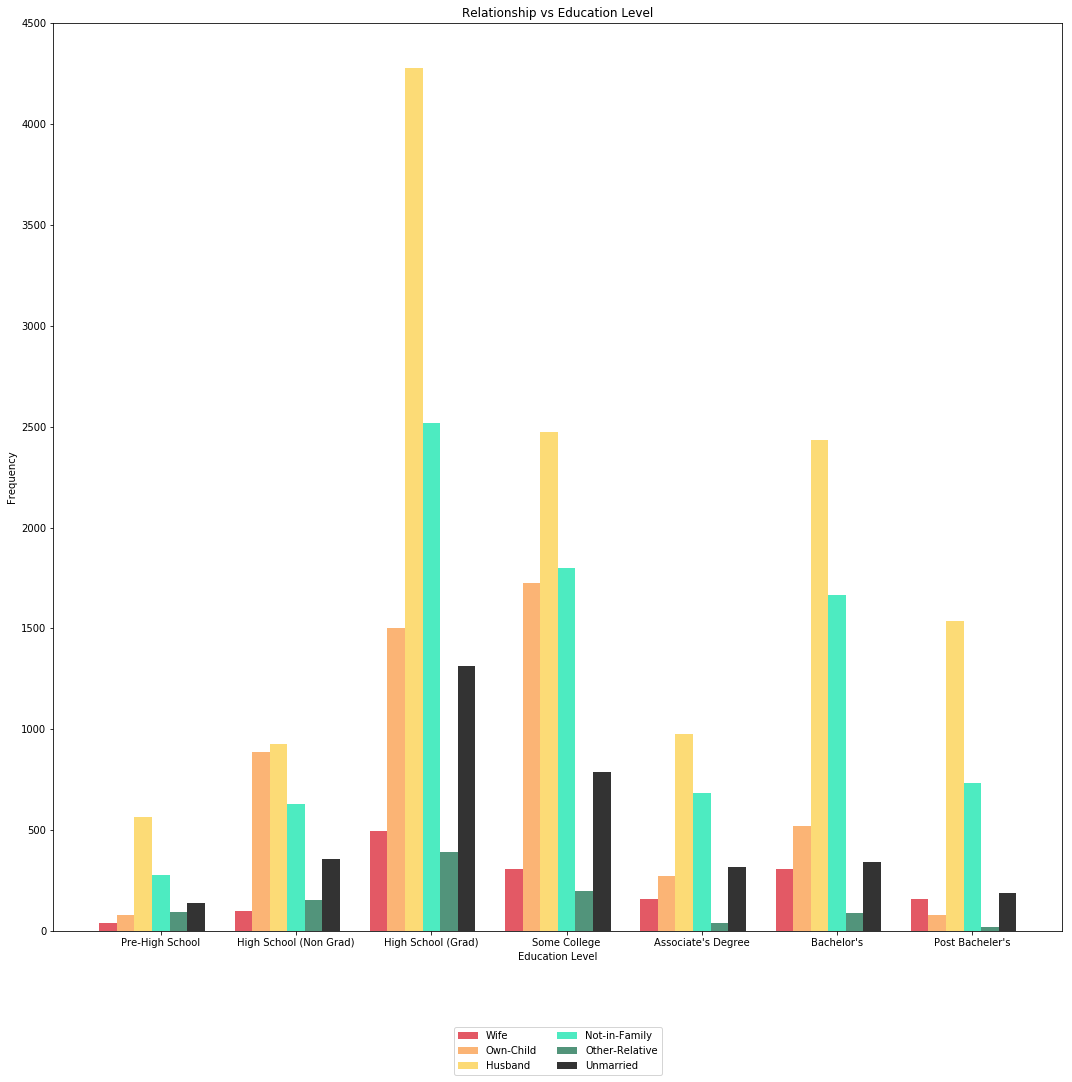

In [42]:
# Relationship VS EDUCATION 

# ('wife_pre_high_school', 41)
# ('wife_some_high_school', 98)
# ('wife_hs_grad', 498)
# ('wife_some_college', 309)
# ('wife_associates', 159)
# ('wife_bach', 305)
# ('wife_post_bach', 158)

# ('own_child_pre_high_school', 79)
# ('own_child_some_high_school', 885)
# ('own_child_hs_grad', 1504)
# ('own_child_some_college', 1725)
# ('own_child_associates', 275)
# ('own_child_bach', 523)
# ('own_child_post_bach', 77)

# ('husband_pre_high_school', 566)
# ('husband_some_high_school', 929)
# ('husband_hs_grad', 4279)
# ('husband_some_college', 2474)
# ('husband_associates', 976)
# ('husband_bach', 2433)
# ('husband_post_bach', 1536)

# ('not_in_fam_pre_high_school', 279)
# ('not_in_fam_some_high_school', 629)
# ('not_in_fam_hs_grad', 2517)
# ('not_in_fam_some_college', 1797)
# ('not_in_fam_associates', 682)
# ('not_in_fam_bach', 1665)
# ('not_in_fam_post_bach', 736)

# ('other_relative_pre_high_school', 94)
# ('other_relative_some_high_school', 155)
# ('other_relative_hs_grad', 391)
# ('other_relative_some_college', 197)
# ('other_relative_associates', 39)
# ('other_relative_bach', 87)
# ('other_relative_post_bach', 18)

# ('unmarried_pre_high_school', 139)
# ('unmarried_some_high_school', 359)
# ('unmarried_hs_grad', 1312)
# ('unmarried_some_college', 789)
# ('unmarried_associates', 318)
# ('unmarried_bach', 342)
# ('unmarried_post_bach', 187)

n_groups = 7

# ORDER IS THE SAME AS THE DOC
wife_education_nums = (wife_pre_high_school,wife_some_high_school,wife_hs_grad,wife_some_college,wife_associates,wife_bach,wife_post_bach)
own_child_education_nums = (own_child_pre_high_school,own_child_some_high_school,own_child_hs_grad,own_child_some_college,own_child_associates,own_child_bach,own_child_post_bach)
husband_education_nums = (husband_pre_high_school,husband_some_high_school,husband_hs_grad,husband_some_college,husband_associates,husband_bach,husband_post_bach)
not_in_fam_education_nums = (not_in_fam_pre_high_school,not_in_fam_some_high_school,not_in_fam_hs_grad,not_in_fam_some_college,not_in_fam_associates,not_in_fam_bach,not_in_fam_post_bach)
other_relative_education_nums = (other_relative_pre_high_school,other_relative_some_high_school,other_relative_hs_grad,other_relative_some_college,other_relative_associates,other_relative_bach,other_relative_post_bach)
unmarried_education_nums = (unmarried_pre_high_school,unmarried_some_high_school,unmarried_hs_grad,unmarried_some_college,unmarried_associates,unmarried_bach,unmarried_post_bach)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.13
opacity = 0.8

rects1 = plt.bar(index, wife_education_nums , bar_width,
alpha=opacity,
color= '#DD2F3E',
label='Wife')

rects2 = plt.bar(index + bar_width, own_child_education_nums , bar_width,
alpha=opacity,
color= '#FBA253',
label='Own-Child')
 
rects3 = plt.bar(index + bar_width + bar_width, husband_education_nums, bar_width,
alpha=opacity,
color='#FCD254',
label='Husband')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, not_in_fam_education_nums, bar_width,
alpha=opacity,
color='#21E6B2',
label='Not-in-Family')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, other_relative_education_nums, bar_width,
alpha=opacity,
color='#277A5A',
label='Other-Relative')

rects6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, unmarried_education_nums, bar_width,
alpha=opacity,
color='Black',
label='Unmarried')

 
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Relationship vs Education Level')
# plt.xticks(index + 1, ('Pre-High School', 'High School (Non Grad)', 'High School (Grad)'
#                          'Some College', 'Associate\'s Degree', 'Bachelor\'s', 'Post Bacheler\'s'))

plt.xticks(index + bar_width + bar_width + bar_width, ('Pre-High School', 'High School (Non Grad)', 'High School (Grad)',
                         'Some College', 'Associate\'s Degree', 'Bachelor\'s', 'Post Bacheler\'s'))
plt.yticks(np.arange(0, 5000, 500))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)


plt.rcParams["figure.figsize"] = [15,15]

plt.tight_layout()
plt.show()

#CHANGE THE NAME PER GRAPH
fig.savefig('relationshipEducation.png')

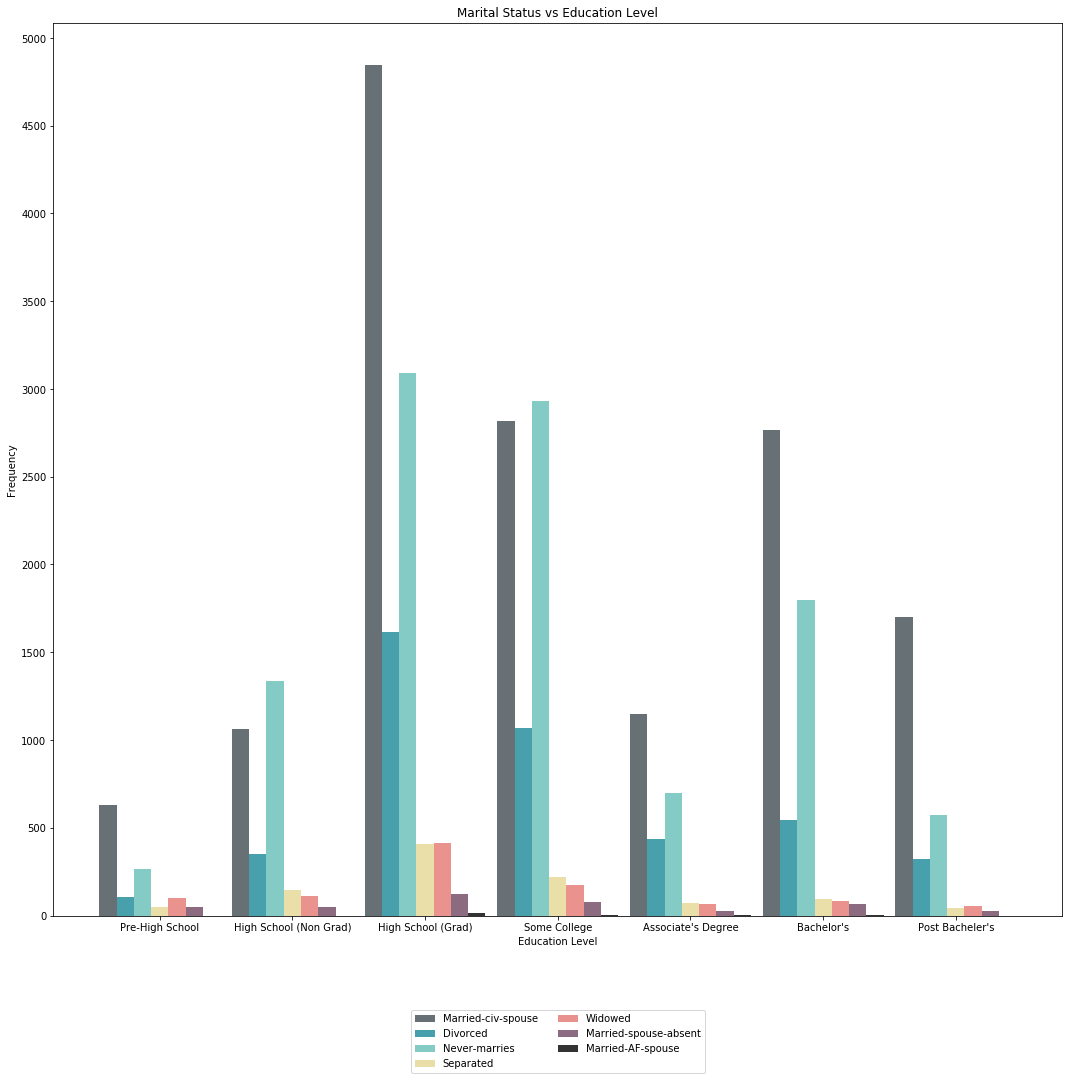

In [46]:
# Marital Status VS EDUCATION 

# ('married_civ_pre_high_school', 632)
# ('married_civ_some_high_school', 1063)
# ('married_civ_hs_grad', 4845)
# ('married_civ_some_college', 2818)
# ('married_civ_associates', 1149)
# ('married_civ_bach', 2768)
# ('married_civ_post_bach', 1701)

# ('divorced_pre_high_school', 104)
# ('divorced_some_high_school', 353)
# ('divorced_hs_grad', 1613)
# ('divorced_some_college', 1069)
# ('divorced_associates', 437)
# ('divorced_bach', 546)
# ('divorced_post_bach', 321)

# ('never_married_pre_high_school', 263)
# ('never_married_some_high_school', 1334)
# ('never_married_hs_grad', 3089)
# ('never_married_some_college', 2933)
# ('never_married_associates', 699)
# ('never_married_bach', 1795)
# ('never_married_post_bach', 570)

# ('separated_pre_high_school', 51)
# ('separated_some_high_school', 144)
# ('separated_hs_grad', 406)
# ('separated_some_college', 220)
# ('separated_associates', 72)
# ('separated_bach', 92)
# ('separated_post_bach', 40)

# ('widowed_pre_high_school', 98)
# ('widowed_some_high_school', 110)
# ('widowed_hs_grad', 414)
# ('widowed_some_college', 172)
# ('widowed_associates', 64)
# ('widowed_bach', 82)
# ('widowed_post_bach', 53)

# ('married_spouse_absent_pre_high_school', 50)
# ('married_spouse_absent_some_high_school', 51)
# ('married_spouse_absent_hs_grad', 121)
# ('married_spouse_absent_some_college', 76)
# ('married_spouse_absent_associates', 25)
# ('married_spouse_absent_bach', 68)
# ('married_spouse_absent_post_bach', 27)

# ('married_af_spouse_pre_high_school', 0)
# ('married_af_spouse_some_high_school', 0)
# ('married_af_spouse_hs_grad', 13)
# ('married_af_spouse_some_college', 3)
# ('married_af_spouse_associates', 3)
# ('married_af_spouse_bach', 4)
# ('married_af_spouse_post_bach', 0)

n_groups = 7

# ORDER IS THE SAME AS THE DOC
married_civ_education_nums = (married_civ_pre_high_school,married_civ_some_high_school,married_civ_hs_grad,married_civ_some_college,married_civ_associates,married_civ_bach,married_civ_post_bach)
divorced_education_nums = (divorced_pre_high_school,divorced_some_high_school,divorced_hs_grad,divorced_some_college,divorced_associates,divorced_bach,divorced_post_bach)
never_married_education_nums = (never_married_pre_high_school,never_married_some_high_school,never_married_hs_grad,never_married_some_college,never_married_associates,never_married_bach,never_married_post_bach)
separated_education_nums = (separated_pre_high_school,separated_some_high_school,separated_hs_grad,separated_some_college,separated_associates,separated_bach,separated_post_bach)
widowed_education_nums = (widowed_pre_high_school,widowed_some_high_school,widowed_hs_grad,widowed_some_college,widowed_associates,widowed_bach,widowed_post_bach)
married_spouse_absent_education_nums = (married_spouse_absent_pre_high_school,married_spouse_absent_some_high_school,married_spouse_absent_hs_grad,married_spouse_absent_some_college,married_spouse_absent_associates,married_spouse_absent_bach,married_spouse_absent_post_bach)
married_af_spouse_education_nums = (married_af_spouse_pre_high_school,married_af_spouse_some_high_school,married_af_spouse_hs_grad,married_af_spouse_some_college,married_af_spouse_associates,married_af_spouse_bach,married_af_spouse_post_bach)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.13
opacity = 0.8

rects1 = plt.bar(index, married_civ_education_nums , bar_width,
alpha=opacity,
color= '#414D52',
label='Married-civ-spouse')

rects2 = plt.bar(index + bar_width, divorced_education_nums , bar_width,
alpha=opacity,
color= '#1A8997',
label='Divorced')
 
rects3 = plt.bar(index + bar_width + bar_width, never_married_education_nums, bar_width,
alpha=opacity,
color='#66BEB7',
label='Never-marries')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, separated_education_nums, bar_width,
alpha=opacity,
color='#E5D793',
label='Separated')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, widowed_education_nums, bar_width,
alpha=opacity,
color='#E57772',
label='Widowed')

rects6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, married_spouse_absent_education_nums, bar_width,
alpha=opacity,
color='#6F4662',
label='Married-spouse-absent')

rects7 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, married_af_spouse_education_nums, bar_width,
alpha=opacity,
color='Black',
label='Married-AF-spouse')

 
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Marital Status vs Education Level')
# plt.xticks(index + 1, ('Pre-High School', 'High School (Non Grad)', 'High School (Grad)'
#                          'Some College', 'Associate\'s Degree', 'Bachelor\'s', 'Post Bacheler\'s'))

plt.xticks(index + bar_width + bar_width + bar_width, ('Pre-High School', 'High School (Non Grad)', 'High School (Grad)',
                         'Some College', 'Associate\'s Degree', 'Bachelor\'s', 'Post Bacheler\'s'))
plt.yticks(np.arange(0, 5500, 500))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)


plt.rcParams["figure.figsize"] = [15,15]

plt.tight_layout()
plt.show()

#CHANGE THE NAME PER GRAPH
fig.savefig('maritalStatusEducation.png')

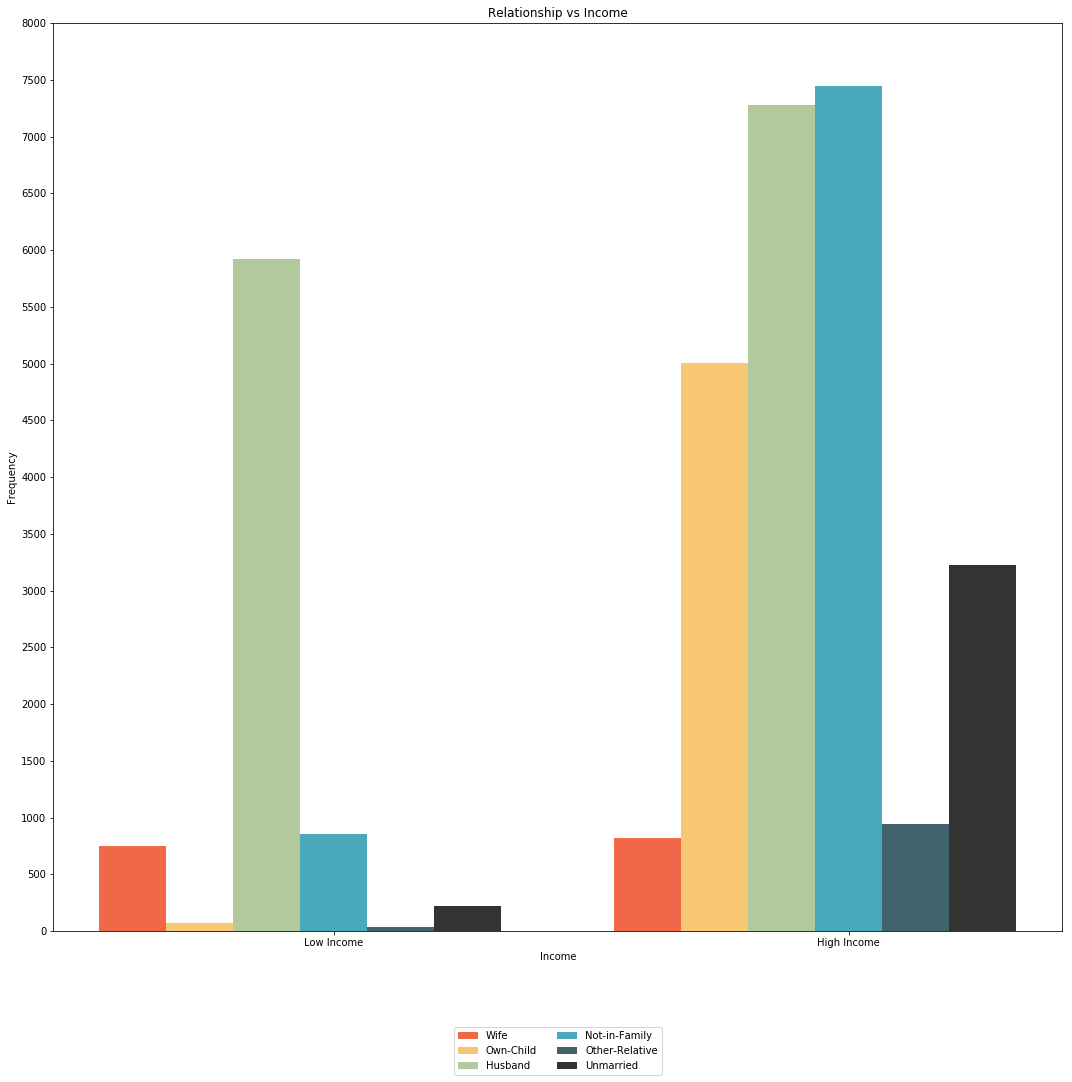

In [52]:
# Relationship VS Income 

# ('wife_high_income', 745)
# ('wife_low_income', 823)

# ('own_child_high_income', 67)
# ('own_child_low_income', 5001)

# ('husband_high_income', 5918)
# ('husband_low_income', 7275)

# ('not_in_fam_high_income', 856)
# ('not_in_fam_low_income', 7449)

# ('other_relative_high_income', 37)
# ('other_relative_low_income', 944)

# ('unmarried_high_income', 218)
# ('unmarried_low_income', 3228)

n_groups = 2

# ORDER - LOW INCOME, HIGH INCOME
wife_income_nums = (wife_high_income,wife_low_income)
own_child_income_nums = (own_child_high_income,own_child_low_income)
husband_income_nums = (husband_high_income,husband_low_income)
not_in_fam_income_nums = (not_in_fam_high_income,not_in_fam_low_income)
other_relative_income_nums = (other_relative_high_income,other_relative_low_income)
unmarried_income_nums = (unmarried_high_income, unmarried_low_income)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.13
opacity = 0.8

rects1 = plt.bar(index, wife_income_nums , bar_width,
alpha=opacity,
color= '#ED4219',
label='Wife')

rects2 = plt.bar(index + bar_width, own_child_income_nums , bar_width,
alpha=opacity,
color= '#F5BA51',
label='Own-Child')
 
rects3 = plt.bar(index + bar_width + bar_width, husband_income_nums, bar_width,
alpha=opacity,
color='#9FBB85',
label='Husband')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, not_in_fam_income_nums, bar_width,
alpha=opacity,
color='#1C94A9',
label='Not-in-Family')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, other_relative_income_nums, bar_width,
alpha=opacity,
color='#123C46',
label='Other-Relative')

rects6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, unmarried_income_nums, bar_width,
alpha=opacity,
color='Black',
label='Unmarried')

 
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Relationship vs Income')
# plt.xticks(index + 1, ('Pre-High School', 'High School (Non Grad)', 'High School (Grad)'
#                          'Some College', 'Associate\'s Degree', 'Bachelor\'s', 'Post Bacheler\'s'))

plt.xticks(index + bar_width + bar_width + bar_width, ('Low Income', 'High Income'))
plt.yticks(np.arange(0, 8500, 500))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)


plt.rcParams["figure.figsize"] = [15,15]

plt.tight_layout()
plt.show()


fig.savefig('relationshipIncome.png')

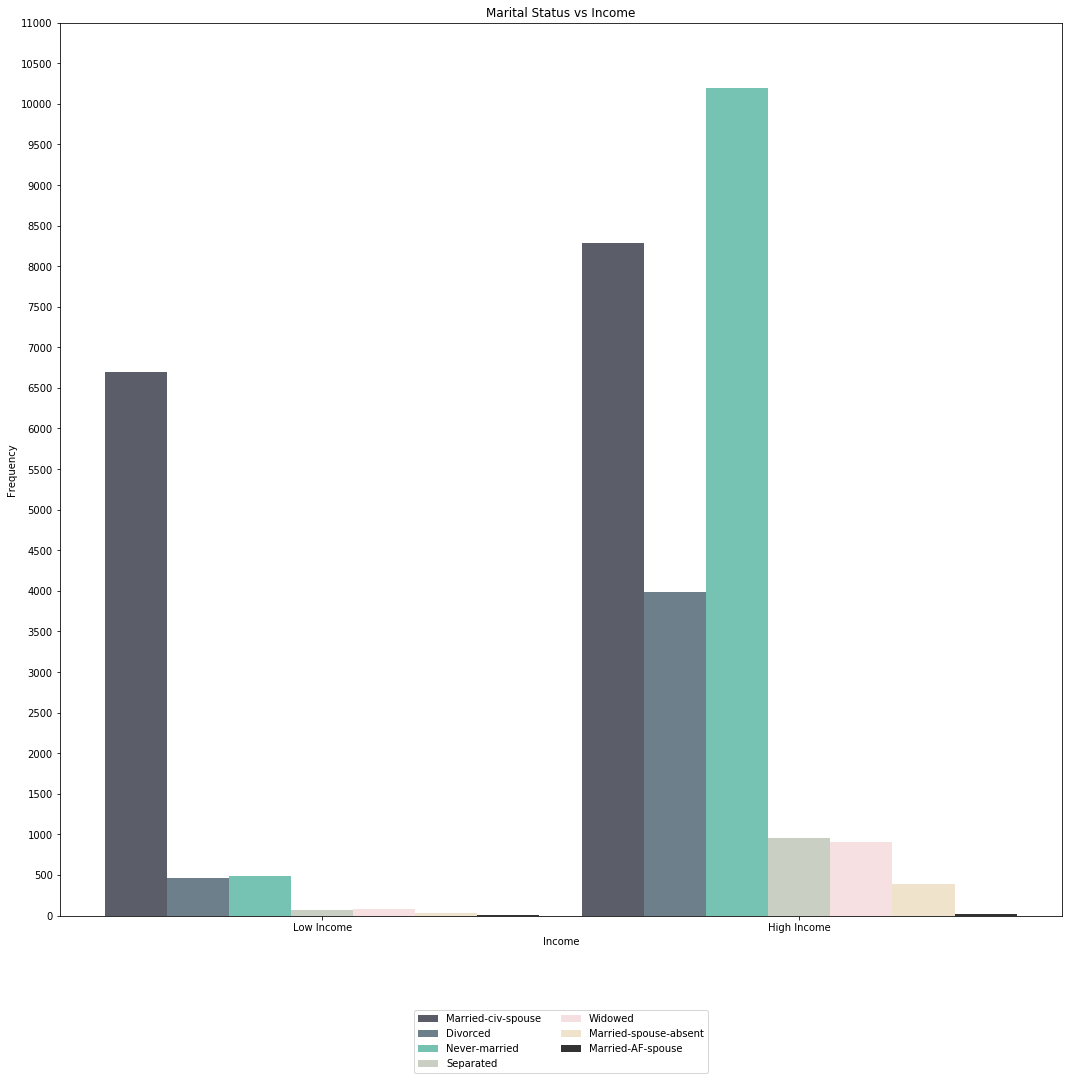

In [56]:
# Marital Status VS Income 

# ('married_civ_high_income', 6692)
# ('married_civ_low_income', 8284)

# ('divorced_high_income', 463)
# ('divorced_low_income', 3980)

# ('never_married_high_income', 491)
# ('never_married_low_income', 10192)

# ('separated_high_income', 66)
# ('separated_low_income', 959)

# ('widowed_high_income', 85)
# ('widowed_low_income', 908)

# ('married_spouse_absent_high_income', 34)
# ('married_spouse_absent_low_income', 384)

# ('married_af_spouse_high_income', 10)
# ('married_af_spouse_low_income', 13)

n_groups = 2

# ORDER - LOW INCOME, HIGH INCOME
married_civ_income_nums = (married_civ_high_income,married_civ_low_income)
divorced_income_nums = (divorced_high_income,divorced_low_income)
never_married_income_nums = (never_married_high_income,never_married_low_income)
separated_income_nums = (separated_high_income,separated_low_income)
widowed_income_nums = (widowed_high_income,widowed_low_income)
married_spouse_absent_income_nums = (married_spouse_absent_high_income, married_spouse_absent_low_income)
married_af_spouse_income_nums = (married_af_spouse_high_income,married_af_spouse_low_income)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.13
opacity = 0.8

rects1 = plt.bar(index, married_civ_income_nums , bar_width,
alpha=opacity,
color= '#323542',
label='Married-civ-spouse')

rects2 = plt.bar(index + bar_width, divorced_income_nums , bar_width,
alpha=opacity,
color= '#495F6E',
label='Divorced')
 
rects3 = plt.bar(index + bar_width + bar_width, never_married_income_nums, bar_width,
alpha=opacity,
color='#54B4A1',
label='Never-married')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, separated_income_nums, bar_width,
alpha=opacity,
color='#BCC5B4',
label='Separated')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, widowed_income_nums, bar_width,
alpha=opacity,
color='#F4D9DA',
label='Widowed')

rects6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, married_spouse_absent_income_nums, bar_width,
alpha=opacity,
color='#ECDDC0',
label='Married-spouse-absent')

rects7 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, married_af_spouse_income_nums, bar_width,
alpha=opacity,
color='Black',
label='Married-AF-spouse')

 
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Marital Status vs Income')
# plt.xticks(index + 1, ('Pre-High School', 'High School (Non Grad)', 'High School (Grad)'
#                          'Some College', 'Associate\'s Degree', 'Bachelor\'s', 'Post Bacheler\'s'))

plt.xticks(index + bar_width + bar_width + bar_width, ('Low Income', 'High Income'))
plt.yticks(np.arange(0, 11500, 500))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)


plt.rcParams["figure.figsize"] = [15,15]

plt.tight_layout()
plt.show()


fig.savefig('maritalStatusIncome.png')